In [1]:
import pandas as pd
broken_df = pd.read_csv('sample-data/csv/userdata1.csv')
broken_df[:3]




,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03T07:55:29Z,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6.759522e+15,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03T17:04:03Z,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,NaN,Canada,1/16/1968,150280.17,Accountant IV,NaN
2,2016-02-03T01:09:31Z,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6.767119e+15,Russia,2/1/1960,144972.51,Structural Engineer,NaN


In [20]:
fixed_df = pd.read_csv('sample-data/csv/userdata1.csv', sep=',', encoding='latin1',parse_dates=['registration_dttm'], dayfirst=True, index_col='id')
fixed_df[:3]

,registration_dttm,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
id,,,,,,,,,,,,
1,2016-02-03 07:55:29+00:00,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6.759522e+15,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
2,2016-02-03 17:04:03+00:00,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,NaN,Canada,1/16/1968,150280.17,Accountant IV,NaN
3,2016-02-03 01:09:31+00:00,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6.767119e+15,Russia,2/1/1960,144972.51,Structural Engineer,NaN


In [36]:
fixed_df['hour'] = fixed_df['registration_dttm'].dt.hour
fixed_df[['registration_dttm','hour']].head(10)

,registration_dttm,hour
id,,
1,2016-02-03 07:55:29+00:00,7
2,2016-02-03 17:04:03+00:00,17
3,2016-02-03 01:09:31+00:00,1
4,2016-02-03 12:36:21+00:00,12
5,2016-02-03 05:05:31+00:00,5
6,2016-02-03 07:22:34+00:00,7
7,2016-02-03 08:33:08+00:00,8
8,2016-02-03 06:47:06+00:00,6
9,2016-02-03 03:52:53+00:00,3


<AxesSubplot:xlabel='salary', ylabel='hour'>

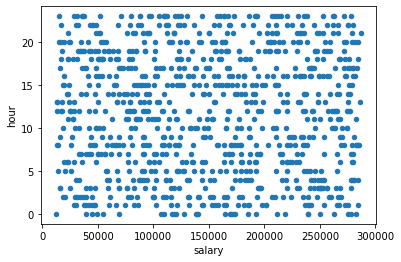

In [39]:
fixed_df[['salary','hour']].plot.scatter(x="salary",y='hour')

In [19]:
#need dependency 'pyarrow' or/and dependency 'fastparquet'
par1=pd.read_parquet('sample-data/parquet/userdata1.parquet', engine='fastparquet', index='id')
par[:3]

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,


In [18]:
par=pd.read_parquet('sample-data/parquet', engine='fastparquet')
par[:3]

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,


In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [20]:
q = """SELECT count(*) 
       FROM par1 ;"""

names = pysqldf(q)
names.head(5)

,count(*)
0,1000


In [21]:
q = """SELECT count(*) 
       FROM par ;"""

names = pysqldf(q)
names.head(5)

,count(*)
0,5000


In [22]:
par.to_csv('sample-data/parquet_to_csv.csv')